In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('../file/ml_pandas/part7/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','accceleration','model_year','origin','name']
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,accceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    float64
 5   accceleration  398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin         398 non-null    int64  
 8   name           398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [51]:
#horsepower Dtype is the object, therefore it won't be appear in the following result
df.describe()


,mpg,cylinders,displacement,weight,accceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [52]:
# find unique values and null values in the horsepower
print(df.horsepower.unique())
print(f'num of null value : {df.horsepower.isnull().sum()}')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
num of null value : 0


In [53]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,accceleration,model_year,origin,name


In [54]:
# replace ?
df['horsepower'].replace('?', np.nan, inplace=True)
print(df['horsepower'].unique())
print(df['horsepower'].count())
print(f'num of null value : {df.horsepower.isnull().sum()}')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' nan '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
392
num of null value : 6


In [55]:
df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       6
weight           0
accceleration    0
model_year       0
origin           0
name             0
dtype: int64

In [56]:
df.notnull().sum()

mpg              398
cylinders        398
displacement     398
horsepower       392
weight           398
accceleration    398
model_year       398
origin           398
name             398
dtype: int64

In [57]:
df.dropna(inplace=True)
print(df['horsepower'].count())
print(f'num of null value : {df.horsepower.isnull().sum()}')

392
num of null value : 0


In [58]:
df.notnull().sum()

mpg              392
cylinders        392
displacement     392
horsepower       392
weight           392
accceleration    392
model_year       392
origin           392
name             392
dtype: int64

In [59]:
df['horsepower'] = df['horsepower'].astype('float')
df.describe()

,mpg,cylinders,displacement,horsepower,weight,accceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#  속성선택  
x = 'cylinders', 'horsepower', 'weight'  
y = 'mpg'

In [60]:
ndf = df[['mpg', 'cylinders','horsepower','weight']]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


In [61]:
#3개의 후보중 단순회귀분석에 사용할 독립벼수를 "선택"한다. 종속변수와 독립변수간의 일대일 관계를 찾는것이므로
# 두 변수 간에 선형관계가 있는지 그래프를 그려서 확인한다. 
# 아래는 두 컴럼의 선형관계를  scatter을 이용해서 확인하는 다양한 방법들의 예시이다.

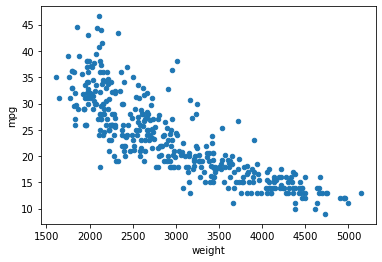

In [62]:
ndf.plot(kind='scatter', x='weight', y='mpg')
plt.show()
plt.close()

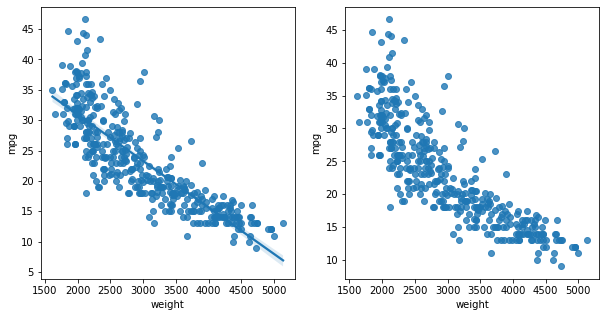

In [63]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)
plt.show()
plt.close()

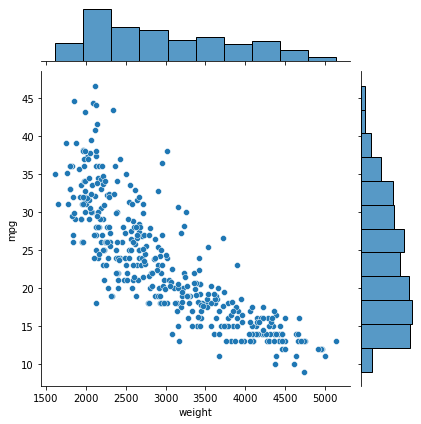

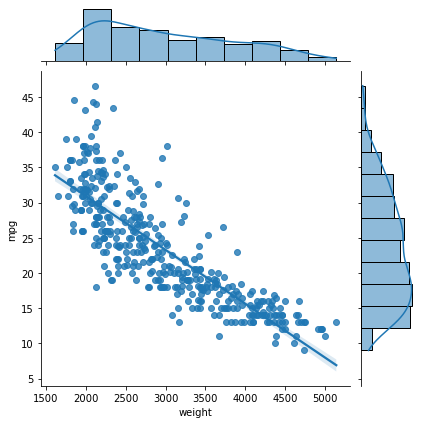

In [64]:
sns.jointplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf, ax=ax2)
plt.show()
plt.close()

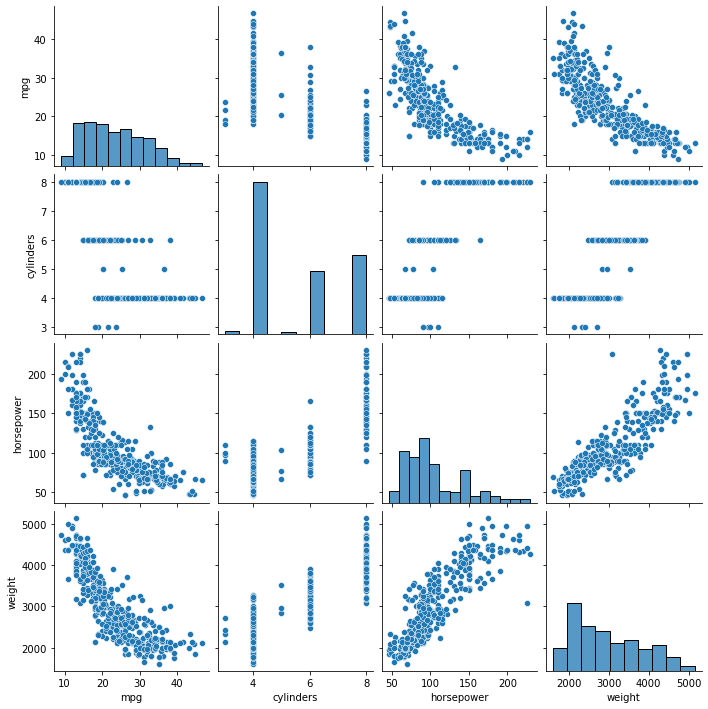

In [65]:
'''
pairplot함수를 이용하여 데이터프레임의 열을 두개씩 짝을 지을 수 있는 모든 경우의 수에 대하여
두변수간의 산점도를 그린다. 앞의 방법들의 임의의 x, y를 정해줬어야 했다.
'''

grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

# 훈련/검증 데이터 분할

In [66]:
'''
앞의 산점도에서 보면 mpg 와 weight, horsepower가 선형관계를 보이는 것이 보인다.
회귀 방정식 찾기 - 훈련데이터와 검증데이터로(7:3) 나눠서 모형 구축
 '''

X = ndf[['weight']]
y = ndf[['mpg']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
#x = 독립변수, y=종속변수, test_size=검증테스트 사이즈, random_stage=랜덤추출값)

print(f'train data  갯수: {len(X_train)}')
print(f'test data 갯수: {len(X_test)}')

train data  갯수: 274
test data 갯수: 118


모형 학습 및 검증

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [68]:
# 회귀식의 기울기
print(f'기울기 a: {lr.coef_}')
print(f'\n')

# 회귀식의 y절편
print(f'y절편 b: {lr.intercept_}')

기울기 a: [[-0.00775343]]


y절편 b: [46.71036626]


c:\Users\Kelly\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Kelly\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


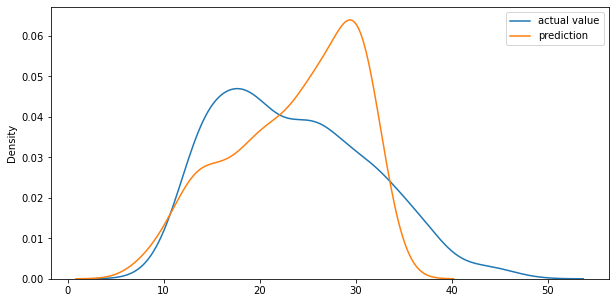

In [77]:
''' 
모형이 예측한 결과와 실제 값을 비교해 본다. 독립변수 전체데이타(X)를 predict() 메소드에
입력하여 모형이 반환하는 예측값을 y_hat에 저장한다.
실제 값 y와 모형의 예측값 y_hat을 
'''
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, label="actual value", hist=False)
ax2 = sns.distplot(y_hat, label="prediction", ax=ax1, hist=False)
plt.legend()
plt.show()


실제값은 왼쪽으로 편향되어있고 예측값은 반대로 오른쪽으로 편중되는 경향을 보인다. 따라서 독립변수(weight) 와 종속 변수(mpg) 사이에 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보인다.   
앞서 그린 산점도를 보면 직선보다는 곡선의 형태가 더 적합해 보인다. 이럴경우 비선형 회귀분석을 통해 모형의 정확도를 높일 수 있다.   